In [42]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [43]:
from utils import load_data

def get_data(num_training=25709, num_validation=3000, num_pub_test=1000, num_pri_test=1000):
    """
    Load the dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    X_train, y_train, X_pub_test, y_pub_test, X_pri_test, y_pri_test = load_data()
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_pub_test))
    X_pub_test = X_pub_test[mask]
    y_pub_test = y_pub_test[mask]
    mask = list(range(num_pri_test))
    X_pri_test = X_pri_test[mask]
    y_pri_test = y_pri_test[mask]

#     # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_pub_test -= mean_image
    X_pri_test -= mean_image  
    return X_train, y_train, X_val, y_val, X_pub_test, y_pub_test, X_pri_test, y_pri_test
    #return X_train, y_train, X_pub_test, y_pub_test, X_pri_test, y_pri_test

# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_pub_test, y_pub_test
   del X_pri_test, y_pri_test
   print('Clear previously loaded data.')
except:
   pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_pub_test, y_pub_test, X_pri_test, y_pri_test = get_data()
#X_train, y_train, X_pub_test, y_pub_test, X_pri_test, y_pri_test = get_data()

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Public test data shape: ', X_pub_test.shape)
print('Public test labels shape: ', y_pub_test.shape)
print('Private test data shape: ', X_pri_test.shape)
print('Private test labels shape: ', y_pri_test.shape)

Clear previously loaded data.
Train data shape:  (25709, 48, 48)
Train labels shape:  (25709,)
Validation data shape:  (3000, 48, 48)
Validation labels shape:  (3000,)
Public test data shape:  (1000, 48, 48)
Public test labels shape:  (1000,)
Private test data shape:  (1000, 48, 48)
Private test labels shape:  (1000,)


In [44]:
X_train[444].shape


(48, 48)

3


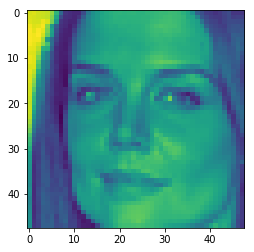

In [45]:
print(y_train[444])
plt.imshow(X_train[444]);

In [ ]:
num_classes = 7

y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_pub_test = keras.utils.to_categorical(y_pub_test, num_classes)
y_pri_test = keras.utils.to_categorical(y_pri_test, num_classes)

In [ ]:
y_train[444]

array([0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
# As before, let's make everything float and scale
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_pub_test = X_pub_test.astype('float32')
X_pri_test = X_pri_test.astype('float32')

X_train /= 255
X_val /= 255
X_pub_test /= 255
X_pri_test /= 255

In [ ]:
#VGG MODEL
# Create model_2 as mentioned in the exercise
# Let's build a CNN using Keras' Sequential capabilities
from keras.layers.normalization import BatchNormalization
model = Sequential()

# 1st Convolutional Layer
model.add(Conv1D(filters=64, input_shape=X_train.shape[1:], kernel_size=3, strides=1, padding='same'))
model.add(Activation('relu'))

# 2nd Convolutional Layer
model.add(Conv1D(filters=64, input_shape=X_train.shape[1:], kernel_size=3, strides=1, padding='same'))
model.add(Activation('relu'))

# Max Pooling
model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))

# 3rd Convolutional Layer
model.add(Conv1D(filters=128, kernel_size=3, strides=1, padding='same'))
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv1D(filters=128, kernel_size=3, strides=1, padding='same'))
model.add(Activation('relu'))

# 5th Convolutional Layer
model.add(Conv1D(filters=128, kernel_size=3, strides=1, padding='same'))
model.add(Activation('relu'))

# Max Pooling
model.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# 3rd Fully Connected Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(7))
model.add(Activation('softmax'))


model.summary()
X_train.shape[1:]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_21 (Conv1D)           (None, 48, 64)            9280      
_________________________________________________________________
activation_37 (Activation)   (None, 48, 64)            0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 48, 64)            12352     
_________________________________________________________________
activation_38 (Activation)   (None, 48, 64)            0         
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 24, 64)            0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 24, 128)           24704     
_________________________________________________________________
activation_39 (Activation)   (None, 24, 128)           0         
__________

(48, 48)

In [ ]:
batch_size = 64

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.00005, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=40,
              validation_data=(X_val, y_val),
              shuffle=True)

Train on 25709 samples, validate on 3000 samples
Epoch 1/40
25709/25709 [==============================] - 57s 2ms/step - loss: 1.7605 - acc: 0.2798 - val_loss: 1.6807 - val_acc: 0.3370
Epoch 2/40
25709/25709 [==============================] - 55s 2ms/step - loss: 1.6618 - acc: 0.3464 - val_loss: 1.6340 - val_acc: 0.3583
Epoch 3/40
25709/25709 [==============================] - 55s 2ms/step - loss: 1.6058 - acc: 0.3731 - val_loss: 1.5699 - val_acc: 0.3843
Epoch 4/40
25709/25709 [==============================] - 55s 2ms/step - loss: 1.5564 - acc: 0.3960 - val_loss: 1.5424 - val_acc: 0.3980
Epoch 5/40
25709/25709 [==============================] - 55s 2ms/step - loss: 1.5119 - acc: 0.4165 - val_loss: 1.5255 - val_acc: 0.4087
Epoch 6/40
25709/25709 [==============================] - 54s 2ms/step - loss: 1.4678 - acc: 0.4380 - val_loss: 1.5285 - val_acc: 0.4133
Epoch 7/40
25709/25709 [==============================] - 54s 2ms/step - loss: 1.4190 - acc: 0.4581 - val_loss: 1.4830 - val_acc:

In [ ]:
score = model.evaluate(X_pub_test, y_pub_test, verbose=0)
print('Public Test loss:', score[0])
print('Public Test accuracy:', score[1])
score = model.evaluate(X_pri_test, y_pri_test, verbose=0)
print('Private Test loss:', score[0])
print('Private Test accuracy:', score[1])

In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["acc"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_acc"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)